In [ ]:
pip install pandas matplotlib seaborn sqlalchemy

In [ ]:
pip install scikit-learn

In [ ]:
import pandas as pd
import os

# Crie um dicionário para armazenar todos os DataFrames
dataframes = {}

# Liste todos os arquivos CSV
arquivos_csv = [
    'pedidos.csv', 'clientes.csv', 'itens_pedidos.csv',
    'pedidos_pagamentos.csv', 'avaliacoes_pedidos.csv',
    'produtos.csv', 'vendedores.csv', 'geolocalizacao.csv',
    'categorias_produtos.csv'
]

print("Iniciando o carregamento dos arquivos CSV...")

# Loop para carregar cada arquivo CSV em um DataFrame do pandas
for arquivo in arquivos_csv:
    # Remove a extensão .csv para usar como nome da chave no dicionário
    nome_df = os.path.splitext(arquivo)[0]
    try:
        dataframes[nome_df] = pd.read_csv(arquivo)
        print(f"  - Arquivo '{arquivo}' carregado com sucesso como '{nome_df}'.")
    except FileNotFoundError:
        print(f"  - ATENÇÃO: Arquivo '{arquivo}' não encontrado.")

print("\nCarregamento concluído!")

# Exemplo: Visualizando as primeiras 5 linhas da tabela de pedidos
print("\nExemplo - Tabela de Pedidos:")
print(dataframes['pedidos'].head())

Iniciando o carregamento dos arquivos CSV...
  - Arquivo 'pedidos.csv' carregado com sucesso como 'pedidos'.
  - Arquivo 'clientes.csv' carregado com sucesso como 'clientes'.
  - Arquivo 'itens_pedidos.csv' carregado com sucesso como 'itens_pedidos'.
  - Arquivo 'pedidos_pagamentos.csv' carregado com sucesso como 'pedidos_pagamentos'.
  - Arquivo 'avaliacoes_pedidos.csv' carregado com sucesso como 'avaliacoes_pedidos'.
  - Arquivo 'produtos.csv' carregado com sucesso como 'produtos'.
  - Arquivo 'vendedores.csv' carregado com sucesso como 'vendedores'.
  - Arquivo 'geolocalizacao.csv' carregado com sucesso como 'geolocalizacao'.
  - Arquivo 'categorias_produtos.csv' carregado com sucesso como 'categorias_produtos'.

Carregamento concluído!

Exemplo - Tabela de Pedidos:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2

In [1]:
# Conecta-se diretamente ao banco de dados que acabamos de criar
import sqlite3
import pandas as pd

# Defina o nome do arquivo do banco de dados SQLite
db_filename = 'banco_de_dados.db' #

try:
    con = sqlite3.connect(db_filename)
    print(f"Conectado ao banco de dados: {db_filename}")

    # Escrever os DataFrames no banco de dados como tabelas
    print("\nEscrevendo DataFrames para tabelas no banco de dados...")
    for nome_df, df in dataframes.items():
        # Use if_exists='replace' para recriar a tabela cada vez que o script roda
        # Use index=False para evitar escrever o índice do DataFrame como uma coluna no banco de dados
        try:
            df.to_sql(nome_df, con, if_exists='replace', index=False)
            print(f"  - DataFrame '{nome_df}' escrito com sucesso.")
        except Exception as e:
            print(f"  - ATENÇÃO: Erro ao escrever o DataFrame '{nome_df}': {e}")

    # Escreve a consulta SQL. Usar aspas triplas permite quebrar a linha.
    # Esta consulta junta 3 tabelas para obter a informação desejada.
    query_sql = """
    SELECT
        c.customer_state AS Estado,
        SUM(ip.price) AS Faturamento_Total
    FROM
        clientes c
    JOIN
        pedidos p ON c.customer_id = p.customer_id
    JOIN
        itens_pedidos ip ON p.order_id = ip.order_id
    GROUP BY
        c.customer_state
    ORDER BY
        Faturamento_Total DESC;
    """

    print("\nExecutando consulta SQL para obter faturamento por estado...")

    # Usa o pandas para ler o resultado da consulta SQL diretamente em um novo DataFrame
    faturamento_por_estado_df = pd.read_sql_query(query_sql, con)

    print("Consulta executada. Exibindo os 10 estados com maior faturamento:")
    print(faturamento_por_estado_df.head(10))

except sqlite3.Error as e:
    print(f"Erro ao conectar ou executar consulta no banco de dados: {e}")
except NameError:
    print("Erro: A variável 'dataframes' não foi encontrada. Certifique-se de que a célula de carregamento dos CSVs foi executada.")

finally:
    # Fecha a conexão com o banco de dados, se estiver aberta
    if 'con' in locals() and con:
        con.close()
        print(f"\nConexão com {db_filename} fechada.")

Conectado ao banco de dados: banco_de_dados.db

Escrevendo DataFrames para tabelas no banco de dados...
Erro: A variável 'dataframes' não foi encontrada. Certifique-se de que a célula de carregamento dos CSVs foi executada.

Conexão com banco_de_dados.db fechada.


/tmp/ipython-input-9-803558496.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  faturamento_mensal = vendas_df.set_index('order_purchase_timestamp').resample('M')['price'].sum()


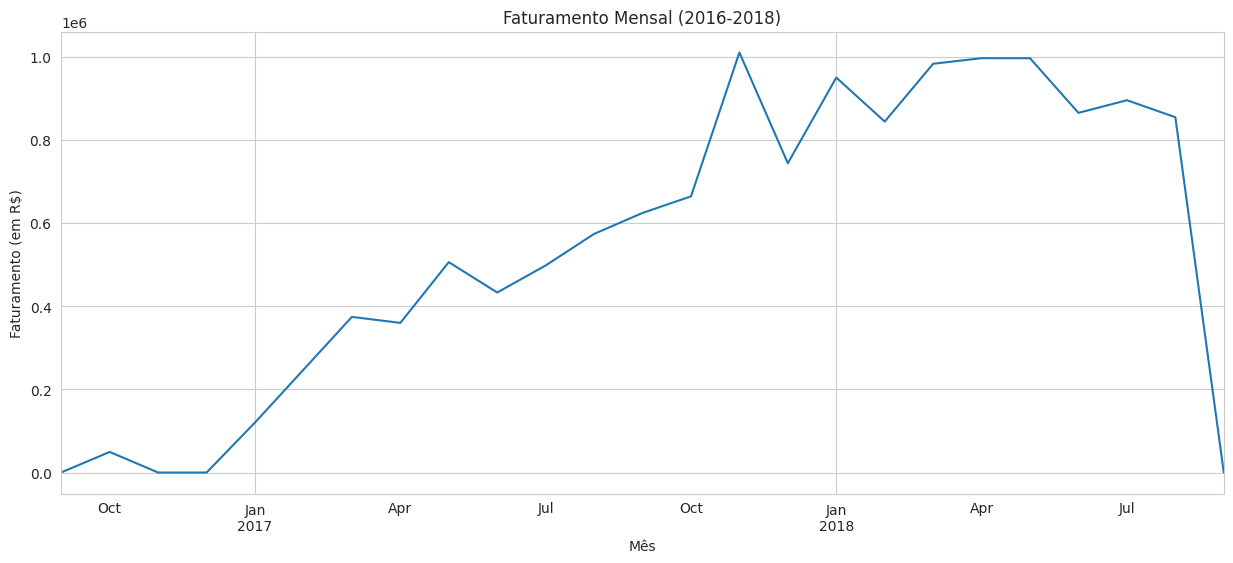

/tmp/ipython-input-9-803558496.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='review_score', data=avaliacoes_df, palette='viridis', order=avaliacoes_df['review_score'].value_counts().index)


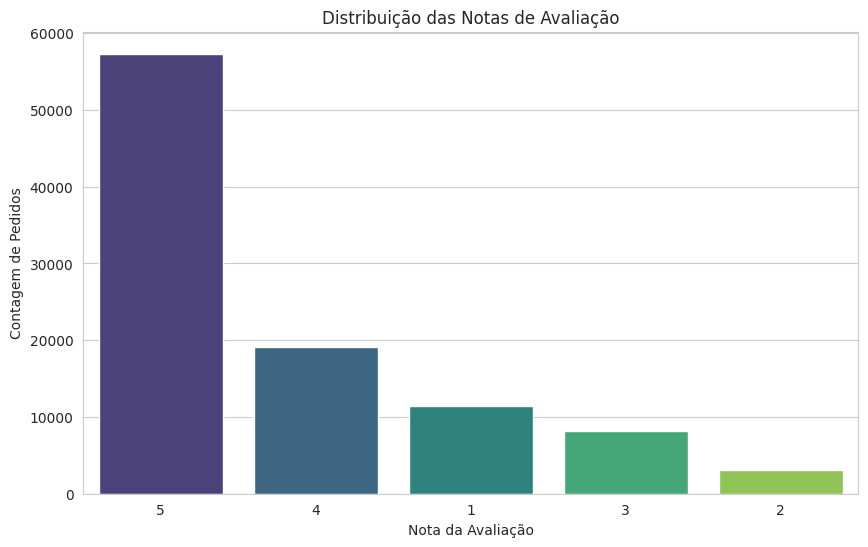

/tmp/ipython-input-9-803558496.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_categorias.values, y=top_10_categorias.index, orient='h', palette='rocket')


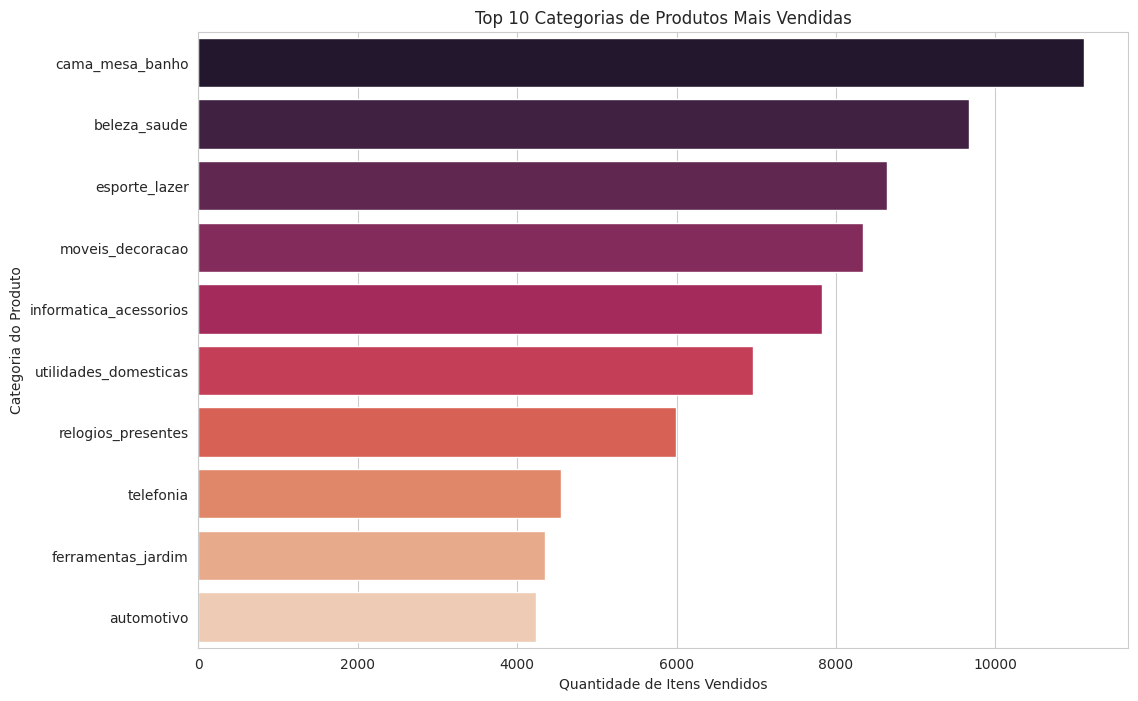

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando um estilo visual mais agradável para os gráficos
sns.set_style("whitegrid")

# --- Pergunta 1: Qual é a evolução do faturamento ao longo do tempo? ---

# Primeiro, precisamos garantir que as colunas de data estão no formato correto
pedidos_df = dataframes['pedidos']
pedidos_df['order_purchase_timestamp'] = pd.to_datetime(pedidos_df['order_purchase_timestamp'])

# Juntando pedidos com itens_pedidos para ter data e preço na mesma tabela
vendas_df = pd.merge(pedidos_df, dataframes['itens_pedidos'], on='order_id')

# Agrupando por mês
faturamento_mensal = vendas_df.set_index('order_purchase_timestamp').resample('M')['price'].sum()

# Plotando o gráfico
plt.figure(figsize=(15, 6))
faturamento_mensal.plot(title='Faturamento Mensal (2016-2018)')
plt.xlabel('Mês')
plt.ylabel('Faturamento (em R$)')
plt.show()


# --- Pergunta 2: Qual a distribuição das notas de avaliação dos pedidos? ---

avaliacoes_df = dataframes['avaliacoes_pedidos']

plt.figure(figsize=(10, 6))
sns.countplot(x='review_score', data=avaliacoes_df, palette='viridis', order=avaliacoes_df['review_score'].value_counts().index)
plt.title('Distribuição das Notas de Avaliação')
plt.xlabel('Nota da Avaliação')
plt.ylabel('Contagem de Pedidos')
plt.show()


# --- Pergunta 3: Quais são as categorias de produtos mais vendidas? ---

# Juntando produtos, categorias e itens vendidos
produtos_completos_df = pd.merge(dataframes['itens_pedidos'], dataframes['produtos'], on='product_id')
produtos_completos_df = pd.merge(produtos_completos_df, dataframes['categorias_produtos'], on='product_category_name')

# Contando as vendas por categoria (Top 10)
top_10_categorias = produtos_completos_df['product_category_name'].value_counts().head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_categorias.values, y=top_10_categorias.index, orient='h', palette='rocket')
plt.title('Top 10 Categorias de Produtos Mais Vendidas')
plt.xlabel('Quantidade de Itens Vendidos')
plt.ylabel('Categoria do Produto')
plt.show()

In [ ]:
import pandas as pd
import numpy as np


# --- 1. Juntando as tabelas necessárias ---
# Começamos com a tabela de avaliações, que tem nossa variável alvo.
df = pd.merge(dataframes['avaliacoes_pedidos'], dataframes['pedidos'], on='order_id')
df = pd.merge(df, dataframes['itens_pedidos'], on='order_id')
df = pd.merge(df, dataframes['produtos'], on='product_id')
df = pd.merge(df, dataframes['clientes'], on='customer_id')

print("Dados unificados. Shape inicial:", df.shape)


# --- 2. Engenharia de Features (Feature Engineering) ---

# Convertendo colunas de data para o formato datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])

# Feature 1: Tempo de entrega em dias
df['tempo_entrega'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

# Feature 2: Diferença entre a entrega real e a estimada (negativo = atrasado)
df['diferenca_estimativa_entrega'] = (df['order_estimated_delivery_date'] - df['order_delivered_customer_date']).dt.days

# Feature 3: Proporção do valor do frete em relação ao preço do produto
df['proporcao_frete_preco'] = df['freight_value'] / df['price']

print("Engenharia de features concluída.")


# --- 3. Criação da Variável Alvo (Target) ---
# Nosso objetivo é prever uma nota alta (5) ou não. É um problema de classificação binária.
df['target_alta_satisfacao'] = df['review_score'].apply(lambda x: 1 if x == 5 else 0)

print("Distribuição da variável alvo:")
print(df['target_alta_satisfacao'].value_counts(normalize=True))

Dados unificados. Shape inicial: (112372, 32)
Engenharia de features concluída.
Distribuição da variável alvo:
target_alta_satisfacao
1    0.56531
0    0.43469
Name: proportion, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Seleção das Features e do Target ---
features = [
    'price',
    'freight_value',
    'tempo_entrega',
    'diferenca_estimativa_entrega',
    'proporcao_frete_preco',
    'product_photos_qty',
    'product_weight_g'
]

target = 'target_alta_satisfacao'

# Removendo linhas com dados faltantes nas features selecionadas (estratégia simples)
df_model = df[features + [target]].dropna()

X = df_model[features]
y = df_model[target]


# --- 2. Divisão dos dados em Treino e Teste ---
# 80% para treinar o modelo, 20% para testar sua performance em dados que ele nunca viu.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")


# --- 3. Treinamento do Modelo ---
# RandomForest é um modelo poderoso, versátil e ótimo como ponto de partida.
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

print("\nIniciando o treinamento do modelo...")
model.fit(X_train, y_train)
print("Treinamento concluído!")

Tamanho do conjunto de treino: (86782, 7)
Tamanho do conjunto de teste: (21696, 7)

Iniciando o treinamento do modelo...
Treinamento concluído!



Acurácia do modelo: 66.52%


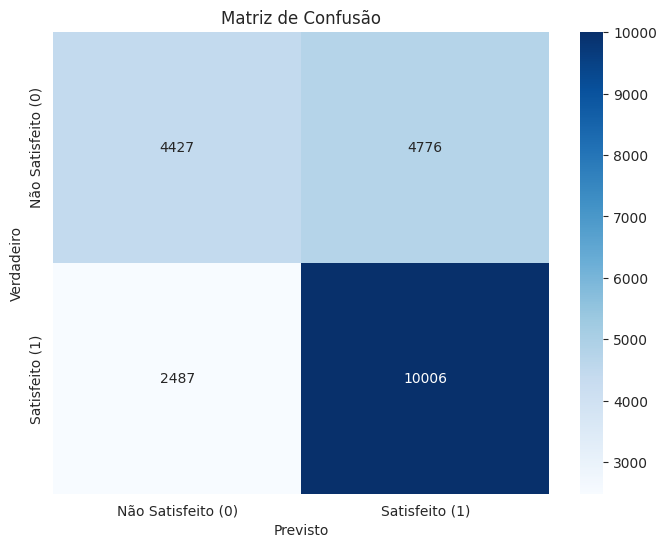


Relatório de Classificação:
                    precision    recall  f1-score   support

Não Satisfeito (0)       0.64      0.48      0.55      9203
    Satisfeito (1)       0.68      0.80      0.73     12493

          accuracy                           0.67     21696
         macro avg       0.66      0.64      0.64     21696
      weighted avg       0.66      0.67      0.66     21696



In [ ]:
# --- 1. Fazendo Previsões com os Dados de Teste ---
y_pred = model.predict(X_test)

# --- 2. Avaliando a Acurácia ---
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAcurácia do modelo: {accuracy:.2%}")

# --- 3. Analisando a Matriz de Confusão ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Satisfeito (0)', 'Satisfeito (1)'],
            yticklabels=['Não Satisfeito (0)', 'Satisfeito (1)'])
plt.title('Matriz de Confusão')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()

# --- 4. Relatório de Classificação Detalhado ---
# Mostra precisão, recall e f1-score, métricas importantes para problemas desbalanceados.
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=['Não Satisfeito (0)', 'Satisfeito (1)']))

/tmp/ipython-input-14-3851203634.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='mako')


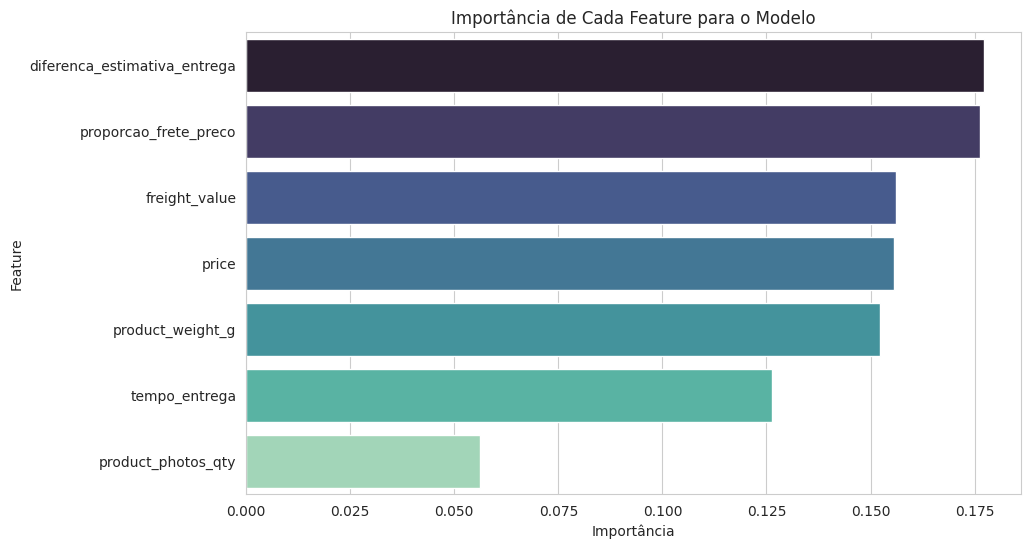

In [ ]:
# --- Análise da Importância das Features ---
feature_importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='mako')
plt.title('Importância de Cada Feature para o Modelo')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.show()